# Data Collection:


In [2]:
import yfinance as yf

# Download Nifty50 data
nifty_data = yf.download('^NSEI', start='2010-01-01', end='2023-07-31')


[*********************100%***********************]  1 of 1 completed


In [3]:
nifty_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0
...,...,...,...,...,...,...
2023-07-24,19748.449219,19782.750000,19658.300781,19672.349609,19672.349609,265600
2023-07-25,19729.349609,19729.349609,19615.949219,19680.599609,19680.599609,369700
2023-07-26,19733.349609,19825.599609,19716.699219,19778.300781,19778.300781,244700


# Feature Engineering:

In [30]:
# Perform feature engineering to add technical indicators to the dataset
# (You may need to import appropriate libraries and implement the calculations)
nifty_data['SMA_50'] = nifty_data['Close'].rolling(window=50).mean()
nifty_data['SMA_200'] = nifty_data['Close'].rolling(window=200).mean()
# Add more technical indicators as needed
#rolling(window=50): This part creates a rolling window of size 50 days. It means that for each row in the DataFrame, it looks back at the 50 previous rows (trading days) to calculate the SMA.

In [5]:
nifty_data

,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200
Date,,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0,NaN,NaN
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0,NaN,NaN
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0,NaN,NaN
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0,NaN,NaN
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-07-24,19748.449219,19782.750000,19658.300781,19672.349609,19672.349609,265600,18895.704063,18117.466777
2023-07-25,19729.349609,19729.349609,19615.949219,19680.599609,19680.599609,369700,18921.339062,18131.433027
2023-07-26,19733.349609,19825.599609,19716.699219,19778.300781,19778.300781,244700,18951.175078,18143.953027


# Prepare the Data:

In [6]:
# Drop rows with missing values
nifty_data.dropna(inplace=True)

In [7]:
# Define the target variable 'y' based on the desired prediction horizon
nifty_data['Target'] = nifty_data['Close'].shift(-1)


In [8]:
nifty_data

,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,Target
Date,,,,,,,,,
2010-10-19,6114.450195,6127.049805,6008.149902,6027.299805,6027.299805,0,5781.032012,5322.798259,5982.100098
2010-10-20,6002.950195,6038.100098,5966.750000,5982.100098,5982.100098,0,5791.460010,5326.547759,6101.500000
2010-10-21,6008.899902,6113.500000,5984.899902,6101.500000,6101.500000,0,5805.078008,5330.665759,6066.049805
2010-10-22,6113.399902,6121.100098,6041.350098,6066.049805,6066.049805,0,5818.070000,5334.587009,6105.799805
2010-10-25,6101.250000,6151.299805,6094.600098,6105.799805,6105.799805,0,5831.143994,5338.800508,6082.000000
...,...,...,...,...,...,...,...,...,...
2023-07-24,19748.449219,19782.750000,19658.300781,19672.349609,19672.349609,265600,18895.704063,18117.466777,19680.599609
2023-07-25,19729.349609,19729.349609,19615.949219,19680.599609,19680.599609,369700,18921.339062,18131.433027,19778.300781
2023-07-26,19733.349609,19825.599609,19716.699219,19778.300781,19778.300781,244700,18951.175078,18143.953027,19659.900391


In [9]:
nifty_data.dropna(inplace=True)



User
nifty_data['SMA_50'] = nifty_data['Close'].rolling(window=50).mean() What it means?
ChatGPT
The code nifty_data['SMA_50'] = nifty_data['Close'].rolling(window=50).mean() calculates the 50-day Simple Moving Average (SMA) of the Nifty 50 index's closing prices and adds it as a new column called 'SMA_50' to the nifty_data DataFrame.

Here's a breakdown of what each part of the code does:


nifty_data['Target']: This assigns the shifted 'Close' values to a new column called 'Target' in the nifty_data DataFrame. The 'Target' column will now contain the closing prices of the Nifty 50 index for the next trading day for each row.
By doing this, you've essentially aligned the current closing price with the past closing price of the next trading day, not the future closing price.

This kind of data preparation is often used in time series forecasting tasks, where you want to predict a future value based on past data. In this case, 'Target' contains the actual closing prices of the Nifty 50 index for the next trading day, which can be used as the target variable for training a time series forecasting model.







In [11]:
# Define features 'X' and target variable 'y'
X = nifty_data[['SMA_50', 'SMA_200']]  # Include other technical indicators as needed
y = nifty_data['Target']

# Split Data into Training and Testing Sets:

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train a Machine Learning Model:
Choose a machine learning algorithm suitable for regression tasks (predicting continuous values) such as Linear Regression, Random Forest Regressor, or Gradient Boosting Regressor. Here, we'll use the Random Forest Regressor.

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [33]:
X_train

,SMA_50,SMA_200
Date,,
2022-04-27,17106.277070,17212.254487
2016-10-19,8704.110020,8042.495005
2021-10-29,17565.313984,15773.080483
2022-02-03,17438.750859,16699.344458
2014-01-13,6191.272002,5919.104749
...,...,...
2023-06-02,17890.124102,17850.606260
2015-04-24,8666.961992,8238.372021
2015-06-15,8338.330010,8340.605522


In [34]:
y_train

Date
2022-04-27    17245.050781
2016-10-19     8699.400391
2021-10-29    17929.650391
2022-02-03    17516.300781
2014-01-13     6241.850098
                  ...     
2023-06-02    18593.849609
2015-04-24     8213.799805
2015-06-15     8047.299805
2016-02-12     7162.950195
2014-05-02     6699.350098
Name: Target, Length: 2504, dtype: float64

In [35]:
X_test

,SMA_50,SMA_200
Date,,
2017-10-17,9952.275039,9384.106753
2021-03-22,14759.986992,12519.309761
2011-07-07,5509.307012,5744.166997
2016-12-21,8332.517979,8221.581753
2021-12-16,17741.479961,16234.615474
...,...,...
2011-09-12,5303.872979,5563.286992
2013-01-14,5817.733994,5412.913499
2017-09-05,9844.388008,9108.192744


In [36]:
y_test

Date
2017-10-17    10210.849609
2021-03-22    14814.750000
2011-07-07     5660.649902
2016-12-21     7979.100098
2021-12-16    16985.199219
                  ...     
2011-09-12     4940.950195
2013-01-14     6056.600098
2017-09-05     9916.200195
2019-12-27    12255.849609
2016-01-11     7510.299805
Name: Target, Length: 627, dtype: float64

# Evaluate the Model:

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)



In [38]:
y_pred

array([10153.61385742, 14619.00564453,  5593.73353516,  8022.67742187,
       16982.59589844,  8165.71551758,  8603.60353516, 10393.63586914,
        5223.21299316,  7711.70632324,  5321.69249512, 11802.7987207 ,
        6749.73862793,  8681.62422852,  5535.93195313, 10358.59702148,
        8230.60718262,  5143.53091309, 17631.32173828,  5899.31939453,
       11565.30273438,  9381.94557617,  5359.0250293 , 15174.43269531,
        9105.84584961,  6033.24946777,  5289.27114746,  5214.84955078,
        9062.95639648, 17547.42082031,  5683.26147461,  5421.9454541 ,
       10697.59800781,  8545.67661133,  5784.76452148, 16194.92389648,
        8538.73469727,  5101.79712402, 12527.88167969,  5754.93050781,
        5571.39359375, 17442.47058594, 10142.88651367,  5241.33549805,
       11607.41893555, 11433.37390625, 10480.91570312,  8106.23158203,
        5188.44702148,  5145.11138672, 17639.16025391,  8624.67347656,
       10093.12746094,  5238.0515332 , 10857.25234375,  8243.79648926,
      

In [39]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 26608.147124106745
R-squared: 0.9984052241078734


MSE : The Mean Squared Error measures the average squared difference between the predicted values and the actual (ground truth) values in the test dataset.
Lower values of MSE indicate better performance, as it means the model's predictions are closer to the actual values.

R-squared (R2) : R-squared, also known as the coefficient of determination, measures how well the model fits the data by calculating the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features).
R2 ranges from 0 to 1. A value of 1 indicates that the model explains all the variance in the data, while a value of 0 means the model does not explain any variance, and its predictions are no better than the mean of the target values.
High R-squared values indicate that the model's predictions are close to the actual values.

In [40]:
import matplotlib.pyplot as plt


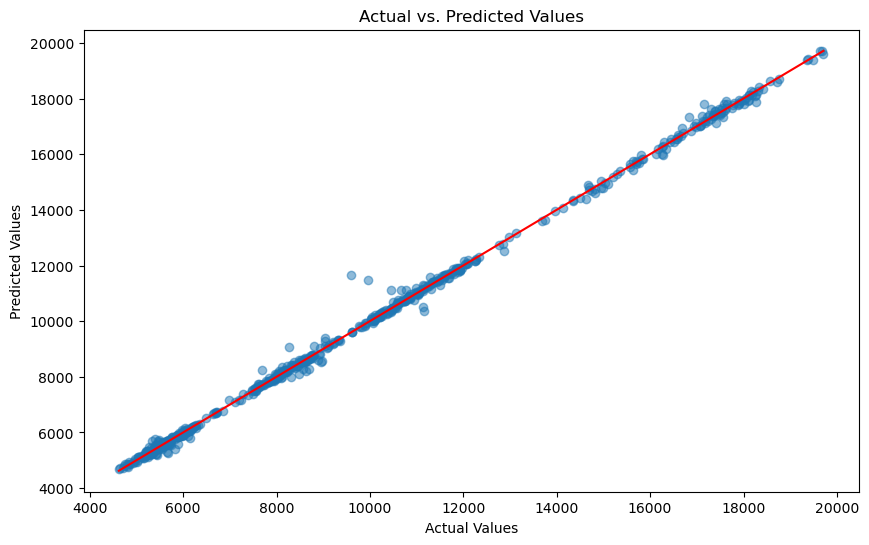

In [41]:
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


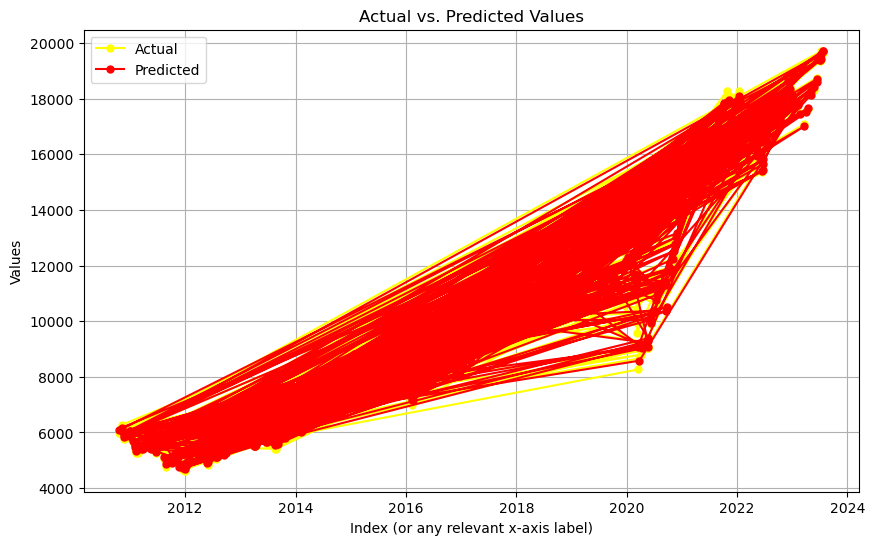

In [42]:
plt.figure(figsize=(10, 6))

# Plot the actual values in blue
plt.plot(y_test.index, y_test, label='Actual', color='yellow', marker='o', markersize=5)

# Plot the predicted values in red
plt.plot(y_test.index, y_pred, label='Predicted', color='red', marker='o', markersize=5)

plt.xlabel('Index (or any relevant x-axis label)')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
# Assuming you have already trained and saved the model as 'trained_model.pkl'
import pickle




In [44]:
model.score(X_test, y_test)

0.9984052241078734

In [46]:
model.predict([[19011.060117,18167.250527]])


D:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([19699.86541016])